<a href="https://colab.research.google.com/github/kalyankalluri999/Academic-Projects/blob/main/INCEPTION_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

**1. Data Loading and Structure**

We start by exploring the dataset to look at the classes/breeds of the dogs to understand more about its structure.


In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
print(os.listdir('/content/drive/MyDrive/Project_ML/Images/'))
dog_classes = os.listdir('/content/drive/MyDrive/Project_ML/Images/')

['n02096051-Airedale', 'n02096177-cairn', 'n02096437-Dandie_Dinmont', 'n02096585-Boston_bull', 'n02097047-miniature_schnauzer', 'n02097130-giant_schnauzer', 'n02097298-Scotch_terrier', 'n02097474-Tibetan_terrier', 'n02097658-silky_terrier', 'n02098105-soft-coated_wheaten_terrier', 'n02098286-West_Highland_white_terrier', 'n02098413-Lhasa', 'n02099267-flat-coated_retriever', 'n02099429-curly-coated_retriever', 'n02099601-golden_retriever', 'n02099712-Labrador_retriever', 'n02099849-Chesapeake_Bay_retriever', 'n02100236-German_short-haired_pointer', 'n02100583-vizsla', 'n02100735-English_setter', 'n02100877-Irish_setter', 'n02101006-Gordon_setter', 'n02101388-Brittany_spaniel', 'n02101556-clumber', 'n02102040-English_springer', 'n02102177-Welsh_springer_spaniel', 'n02102318-cocker_spaniel', 'n02104029-kuvasz', 'n02104365-schipperke', 'n02105056-groenendael', 'n02105251-briard', 'n02105412-kelpie', 'n02105641-Old_English_sheepdog', 'n02106030-collie', 'n02106166-Border_collie', 'n02106550



```
There are 120 subfolders, each belonging to 1 of the 120 dog breeds. For  example, images of the Chow breed are under the subfolder 
 n02112137-chow. We then proceed to extract the name of the dog breeds by splitting the folder name.
```



In [3]:
# Get the dog labels
breeds = [breed.split('-',1)[1] for breed in dog_classes] # get labels by splitting the folder name at dash
breeds[:10] # view some of the labels

['Airedale',
 'cairn',
 'Dandie_Dinmont',
 'Boston_bull',
 'miniature_schnauzer',
 'giant_schnauzer',
 'Scotch_terrier',
 'Tibetan_terrier',
 'silky_terrier',
 'soft-coated_wheaten_terrier']

`Then, for each of the images, we get the full path to the image (stored in X), as well as its associated label/class/breed (stored in y). This allows us to load the images easily.`

In [4]:
# Get images full path and their labels

from itertools import chain
X = []
y = []
fullpaths = ['/content/drive/MyDrive/Project_ML/Images/{}'.format(dog_class) for dog_class in dog_classes]
for counter, fullpath in enumerate(fullpaths):
    for imgname in os.listdir(fullpath):
        X.append([fullpath + '/' + imgname])
        y.append(breeds[counter])
X = list(chain.from_iterable(X)) # unnest the lists and join together into one list
len(X) # number of pictures

20580

**2. Shuffle and Plot Images**

Here, we shuffle the images and their labels together so that they are not grouped by their breeds.



In [5]:
# Random shuffle the images for learning
import random
# shuffle X and y
combined = list(zip(X, y))
random.shuffle(combined)
X[:], y[:] = zip(*combined)

And look at a sample batch of the dog images with their associated labels. Notice that the images have different dimensions, so we will have to resize them later before putting them into the model.

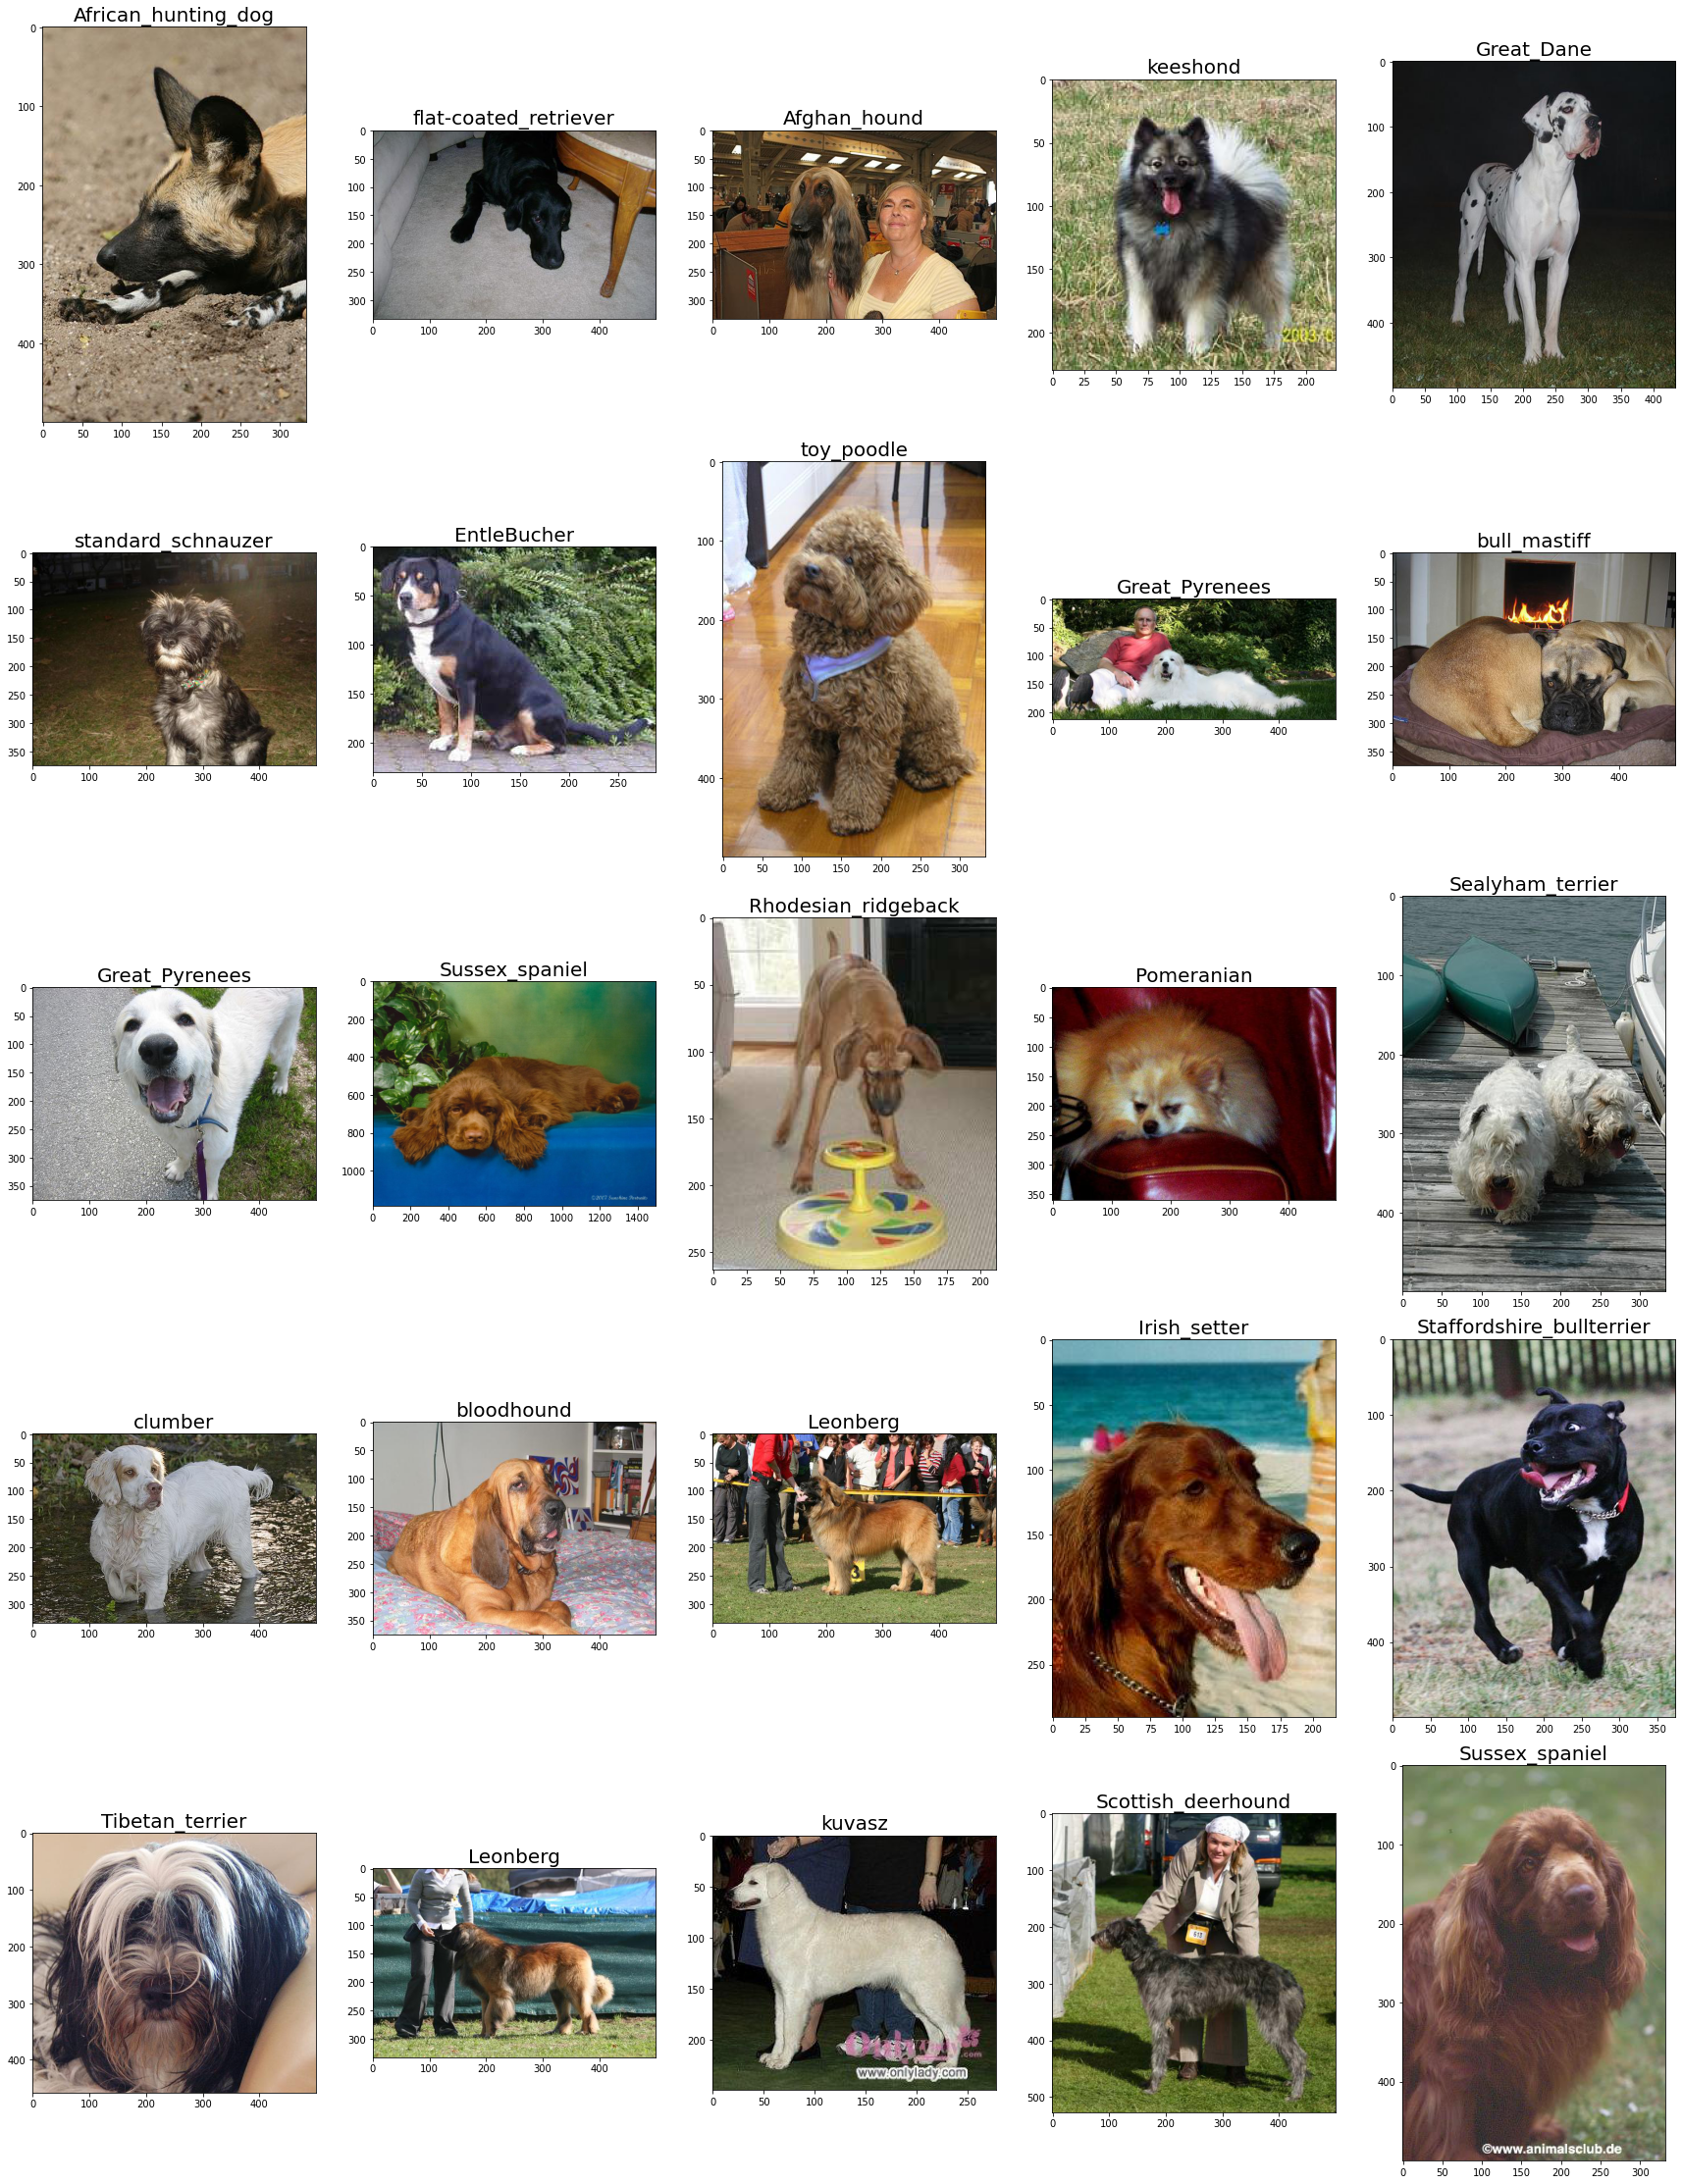

In [6]:
# Display random dogs pictures 

import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.image import imread

plt.figure(figsize=(30,40))
for counter, i in enumerate(random.sample(range(0, len(X)), 25)): # random 25 images
    plt.subplot(5, 5, counter+1)
    plt.subplots_adjust(hspace=0.1)
    filename = X[i]
    image = imread(filename)
    plt.imshow(image)
    plt.title(y[i], fontsize=20)
plt.show()

**3. Subset Data**
The next step is not necessary if you have sufficient computational power. I am running this on a laptop with 8gb of RAM, so everytime the kernel RAM exceeds its memory quota, it shuts down. To deal with that, I subsetted a portion of the dataset. However, this will lower the model performance.

**Note:-** If you are facing this issue as well, proper memory management is highly recommended using the gc.collect() function. This involves deleting the unnecessary variables that you do not need anymore and clearing them from memory.

In [7]:
# Choose a subset to test code
X = X[:4000]
y = y[:4000]

**4. Encoding Data**

It is also very important that we encode the classes/breeds. Here we will use one-hot encoding, so that for each image, there will be 120 columns, with all but 1 column with a value of 0. The only column with a value of 1 is the image's associated class/breed/label.

In [8]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoded labels

from sklearn.preprocessing import LabelEncoder
#from keras.utils import to_categorical

# Label and one-hot encoding y labels
le = LabelEncoder()
le.fit(y)
y_ohe = to_categorical(le.transform(y), len(breeds))
y_ohe = np.array(y_ohe)

**5. Preparing Train, Validation & Test Data**

Now it's time to prepare our training, validation and testing dataset. We do this using the train_test_split function from the sklearn module. But before that, we load the images to the same dimensions and convert them into an image array, each containing the rgb values of every pixel.

**Note:-** It's important to convert the images into a dimension that is similar to the ones that the pre-trained model is trained on.

In [ ]:
# Prepare train, validation and test data
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array, load_img

img_data = np.array([img_to_array(load_img(img, target_size = (299,299)))
                     for img in X]) # load, resize images, and store as array

x_train, x_test, y_train, y_test = train_test_split(img_data, y_ohe,
                                                   test_size = 0.2,
                                                   stratify=np.array(y), # stratify makes sure that proportion of each class in the output is same as the input
                                                   random_state = 2) 

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                 test_size = 0.2,
                                                 stratify=np.array(y_train),
                                                 random_state = 2)
print('Training Dataset Size: ', x_train.shape)
print('Validation Dataset Size: ', x_val.shape)
print('Testing Dataset Size: ', x_test.shape)
print('Training Label Size: ', y_train.shape)
print('Validation Label Size: ', y_val.shape)
print('Testing Label Size: ', y_test.shape)

# clear some space from memory
import gc
del img_data
gc.collect()

We can see that we have 2560 training, 640 validation,and 800 testing images Each image has a 299x299 dimension, with 3 channels, representing the RGB channels.

**6. Data Augmentation**

We also perform data augmentation, especially if we have a small dataset, to give us significantly more diverse data without collecting them. This works by applying some transformation to our images (e.g., rotation, axis flipping) to produce 'new' versions of existing images, thus giving us more data to train with.

In [ ]:
# Data Augmentation

from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32

# Create train generator
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, # only use rescale=1./255 if training from scratch
                                  rotation_range = 30,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  horizontal_flip = True) # CHECK

train_generator = train_datagen.flow(x_train, y_train,
                                     shuffle = False, batch_size = batch_size, seed = 1)

# Create validation generator
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) # do not augment validation data

val_generator = val_datagen.flow(x_val, y_val,
                                shuffle = False, batch_size = batch_size, seed = 1)

Below is an example of an image that was transformed into 'new' images. The model can then extract features from them and learn that these features are associated with this particular breed of dog.

In [ ]:
img_id = 16

dog_generator = train_datagen.flow(x_train[img_id:img_id+1], y_train[img_id:img_id+1],
                                     shuffle = False, batch_size = batch_size, seed = 1)

plt.figure(figsize=(30,20))
dogs = [next(dog_generator) for i in range(0,5)]
for counter, dog in enumerate(dogs): 
    plt.subplot(1, 5, counter+1)
    plt.imshow(dog[0][0])
    #plt.axis('off')
    
plt.show()

**7. Model Building:-** The next part is building the model. For this process, we are using Google's Inception V3 model. There are other models available to use in Keras as well. We remove the last layer of the Inception V3 model, and feed the output of it to our own set of layers, ending with a final Dense layer to classify or predict which of the 120 breeds the images belong to. We also freeze the initial Inception V3 model as it has already been trained before and compile the model.

In [ ]:
# Build Model Using Pre-trained Model

from keras import models
from keras import layers
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model

# load InceptionV3 pre-trained model
base_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (299,299,3))

model = models.Sequential()
model.add(base_model) # add pre_trained layers
model.add(GlobalAveragePooling2D())
#model.add(Flatten()) # flatten to 1-D vector to prepare for fully connected layers
model.add(Dropout(0.3))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(len(breeds), activation = 'softmax'))
# Freeze pre-trained layers
print('Number of trainable weights before freezing the base layer:', len(model.trainable_weights))
model.layers[0].trainable = False
print('Number of trainable weights after freezing the base layer:', len(model.trainable_weights))

In [ ]:
# Compile the Model

model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy']) 
model.summary()

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

**8. Train Model:-**
It's finally time to train our model. The batch size is the number of images passed to the model for training during every iteration. Therefore, the number of iterations/steps is the number of images divided by the batch size, which constitues one epoch. After each iteration, weights of the nodes will be updated. An epoch ends when the entire dataset has been passed through. The more epoch we have, the more the model will train on the data.

In [ ]:
# Train Model

train_steps_per_epoch = x_train.shape[0] // batch_size
val_steps_per_epoch = x_val.shape[0] // batch_size
epochs = 20

history = model.fit_generator(train_generator,
                             steps_per_epoch = train_steps_per_epoch,
                             validation_data = val_generator,
                             validation_steps = val_steps_per_epoch,
                             epochs = epochs, verbose = 1)

**9. Accuracy and Loss Plots:-**
We made plots of the accuracy and loss for the training and validation data. This gives us an idea of how our model is performing (e.g., underfitting, overfitting).

In [ ]:
#Plot Accuracy and Loss 

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Transfer Learning Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,epochs+1))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epochs+1, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, epochs+1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

**10. Predicting on Test Set:-**
We then apply our model to a dataset that it has not seen before. This is important, as we want a model that can generalize to other datasets other than what it is trained on. A model that only does well on the training and validation dataset but not on a testing dataset is not a useful one.

In [ ]:
# Evaluate Model on Test Data

x_test1 = x_test / 255. # rescale to 0-1. Divide by 255 as its the max RGB value
test_predictions = model.predict(x_test1)

# get model predictions
predictions = le.classes_[np.argmax(test_predictions,axis=1)] # get labels and reverse back to get the text labels
# get target labels
target_labels = le.classes_[np.argmax(y_test,axis=1)]

# Store in dataframe
predict_df = pd.DataFrame({'Target_Labels': target_labels, 'Predictions': predictions})
predict_df.head(20)

**11. Model Evaluation Metrics:-**
Next, we get a measure of how well our model is performing by calculating the accuracy of the predictions against the actual target_labels.

In [ ]:
# Get accuracy of measure
correct = (target_labels == predictions)
accuracy = correct.sum() / correct.size
print(accuracy)

A better way is to calculate the precision, recall and F1 score of the classification in addition to accuracy. Looking at the combination of these model evaluation metrics will always give us a better idea of our model performance.

In [ ]:
# Evaluate Model Performance

from model_evaluation_utils import get_metrics
get_metrics(true_labels=target_labels,
            predicted_labels=predictions)

**12. Plot Predictions against Actual Labels:-**


To better visualize our prediction performance, we plot out a small batch of our testing dataset, together with their actual labels, predictions as well as the probability values that our model predict they are in the category.

In [ ]:
# Plot Actual vs Predicted Images with Confidence Levels
plt.figure(figsize=(30,40))
for counter, i in enumerate(random.sample(range(0, len(y_test)), 30)): # random 30 images
    plt.subplot(6, 5, counter+1)
    plt.subplots_adjust(hspace=0.6)
    actual = str(target_labels[i])
    predicted = str(predictions[i])
    conf = str(max(test_predictions[i]))
    plt.imshow(x_test[i]/255.0)
    plt.axis('off')
    plt.title('Actual: ' + actual + '\nPredict: ' + predicted + '\nConf: ' + conf, fontsize=18) 
plt.show()